# ITAcademy - Data Science amb Python
# Sprint 4, Tasca 2: Visualització de múltiples variables

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Exercici 1: Exploració i visualització del dataset tips.csv

### Informació sobre el dataset

Aquest dataset va aparèixer per primer cop en la següent publicació:

    Bryant, P. G. and Smith, M (1995) Practical Data Analysis: Case Studies in Business Statistics. Homewood, IL: Richard D. Irwin Publishing

També es troba disponible a travès del paquet Seaborn, pel qual l'importarem.

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Aquest dataset està compost per les següents variables:

1. **total_bill** - Compte total en dòlars
2. **tip** - Propina en dòlars
3. **sex** - Gènere de la persona que paga el compte
4. **smoker** - Presència de fumadors en el grup de comensals 
5. **day** - Dia de la setmana
6. **time** - Moment del dia
7. **size** - Tamany del grup de comensals

In [3]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### Descripció de les variables cualitatives

In [4]:
for column in tips.select_dtypes(include=['category']):
    print(tips[column].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


In [5]:
tips.describe(include=['category'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


La proporció d'homes és considerablemente major a la de dones, així com la de fumadors respecte als no fumadors. De la mateixa manera, tenim més del doble d'observacions realitzades durant l'hora de sopar que durant el dinar. Per altra banda, en comparació amb la resta de dies, tenim poques observacions realitzades en divendres.   

#### Descripció de les variables cuantitatives

In [6]:
tips.describe(include="number")

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Exploració del dataset

In [7]:
sns.set_theme(style="darkgrid", palette="deep")

#### Propina segons el tamany del grup

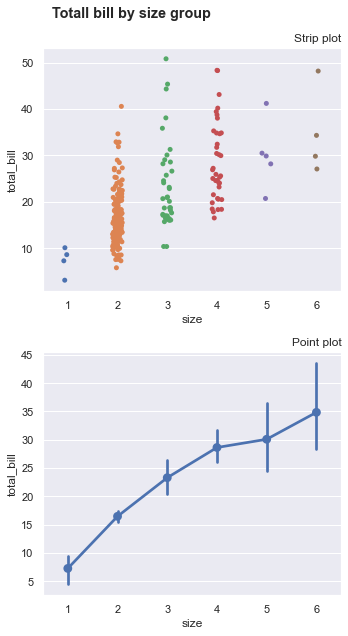

In [34]:
# Size (cualitativa) i total_bill (quantitativa)
fig, (ax1, ax2) = plt.subplots(2,1 , figsize=(5, 9))

sns.stripplot(ax=ax1, data=tips, x="size", y="total_bill")
sns.pointplot(ax=ax2, data=tips, x="size", y="total_bill")

plt.suptitle("Totall bill by size group", x=0.38, fontweight="bold")
ax1.set_title("Strip plot", loc="right")
ax2.set_title("Point plot", loc="right")

plt.tight_layout()
plt.savefig("tips - graph1")
plt.show()

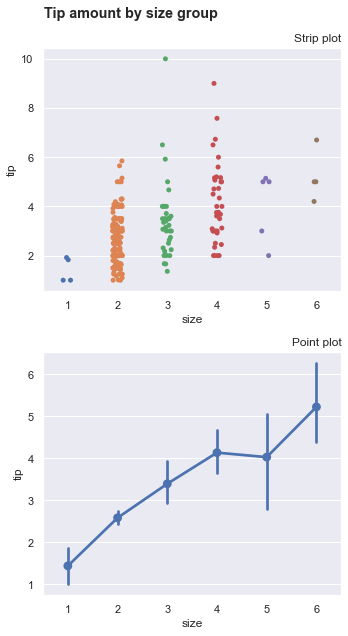

In [35]:
# Size (cualitativa) i tip (quantitativa)
fig, (ax1, ax2) = plt.subplots(2,1 , figsize=(5, 9))

sns.stripplot(ax=ax1, data=tips, x="size", y="tip")
sns.pointplot(ax=ax2, data=tips, x="size", y="tip")

plt.suptitle("Tip amount by size group", x=0.38, fontweight="bold")
ax1.set_title("Strip plot", loc="right")
ax2.set_title("Point plot", loc="right")

plt.tight_layout()
plt.savefig("tips - graph2")
plt.show()

#### Relació entre propina i compte total

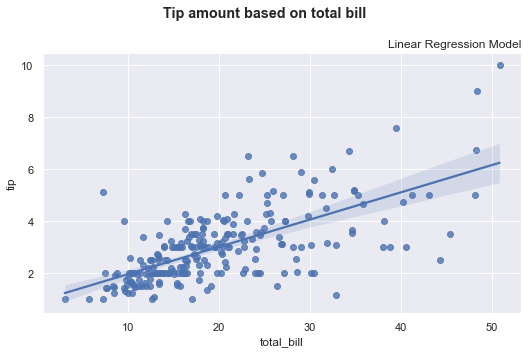

In [36]:
sns.lmplot(data=tips, x="total_bill", y="tip",
           aspect=1.5)

plt.suptitle("Tip amount based on total bill", fontweight="bold")
plt.title("Linear Regression Model", loc="right")

plt.tight_layout()
plt.savefig("tips - graph3")
plt.show()

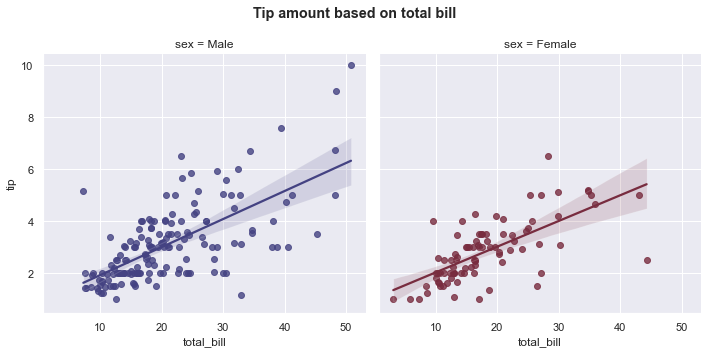

In [37]:
# Afegim una tercera variable qualitativa: sex
sns.lmplot(data=tips, x="total_bill", y="tip",
           hue="sex", col="sex",
           palette="icefire")

plt.suptitle("Tip amount based on total bill", fontweight="bold")

plt.tight_layout()
plt.savefig("tips - graph3")
plt.show()

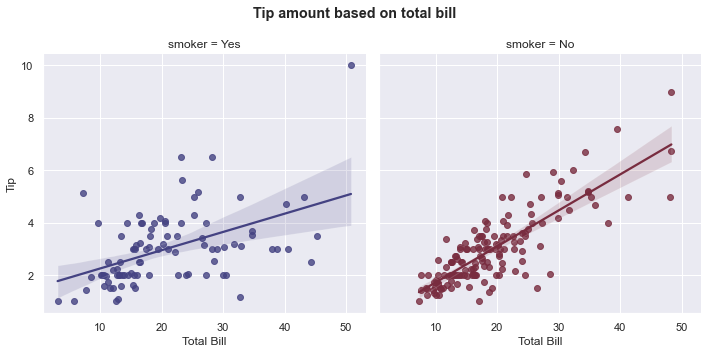

In [38]:
# Afegim una tercera variable qualitativa: smoker
g = sns.lmplot(data=tips, x="total_bill", y="tip", 
           hue="smoker", col="smoker",
           palette="icefire")

plt.suptitle("Tip amount based on total bill", fontweight="bold")
g.set_axis_labels("Total Bill", "Tip")

plt.tight_layout()
plt.savefig("tips - graph4")
plt.show()

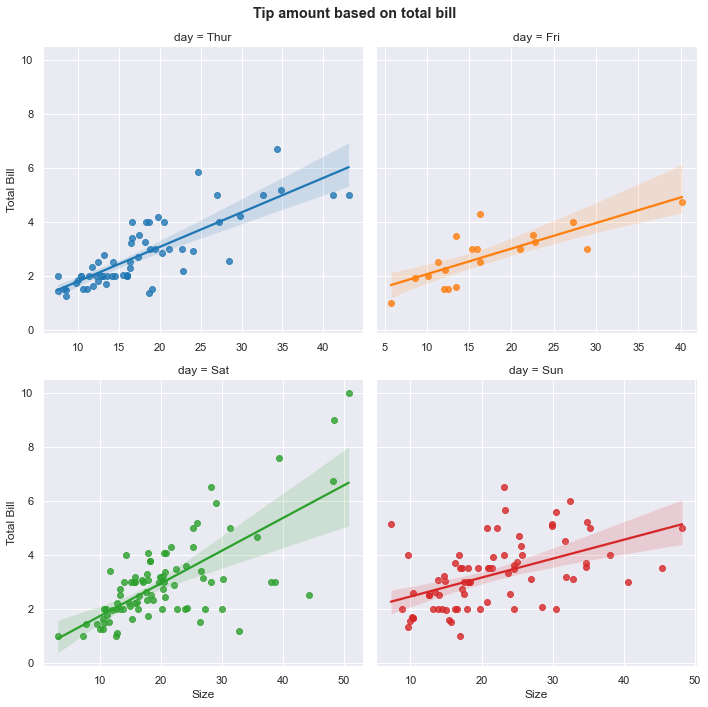

In [39]:
# Afegim una tercera variable qualitativa: day
g= sns.lmplot(data=tips, x="total_bill", y="tip",
              hue="day", col="day", col_wrap=2,
              facet_kws=dict(sharex=False),
              palette="tab10")

plt.suptitle("Tip amount based on total bill", fontweight="bold")
g.set_axis_labels("Size", "Total Bill")

plt.tight_layout()
plt.savefig("tips - graph5")
plt.show()

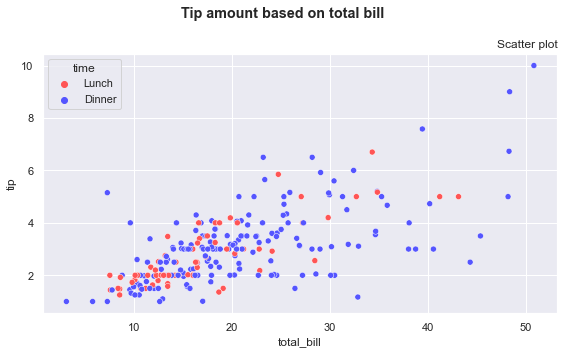

In [40]:
# Afegim una tercera variable: time

fig, ax = plt.subplots(figsize=(8, 5))

sns.scatterplot(data=tips, x="total_bill", y="tip", 
                hue="time", ax=ax, palette="seismic_r")

plt.suptitle("Tip amount based on total bill", fontweight="bold")
plt.title("Scatter plot", loc="right")

plt.tight_layout()
plt.savefig("tips - graph6")
plt.show()

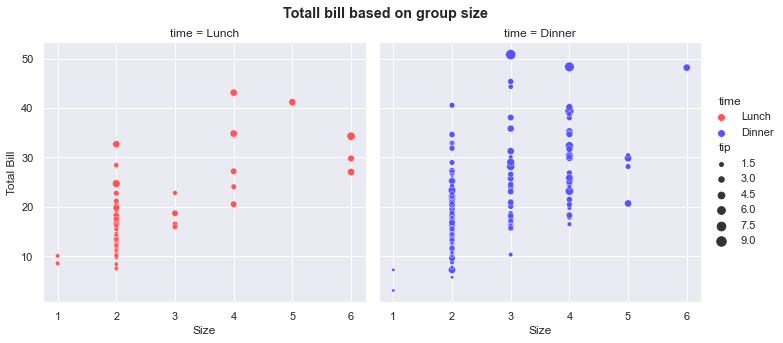

In [41]:
# Dues variables cualitatives (size, time) i dues quantitative (tip, total bill)

g = sns.relplot(data=tips, x="size", y="total_bill",
            hue="time", col="time",
            size="tip", sizes=(10,100),
            kind="scatter", palette="seismic_r")

plt.suptitle("Totall bill based on group size", fontweight="bold",
              x=0.5, y=0.95)

g.figure.subplots_adjust(top=0.85)
g.set_axis_labels("Size", "Total Bill")

plt.savefig("tips - graph7")
plt.show()

## Exercici 2: Exploració i visualització del dataset movies.dat

### Preparació del dataset

In [16]:
movies = pd.read_csv("movies.dat", sep="::", header=None, 
                    names=["ID","Title", "Genre"],
                    encoding="latin-1", engine="python") 
movies.head()

,ID,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
movies.drop("ID", axis=1, inplace=True)

,Title,Genre
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy
...,...,...
3878,Meet the Parents (2000),Comedy
3879,Requiem for a Dream (2000),Drama
3880,Tigerland (2000),Drama
3881,Two Family House (2000),Drama


In [18]:
movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)')
movies.replace('\(\d{4}\)', '', regex=True, inplace=True)
movies['Year'] = pd.to_numeric(movies['Year'])
movies.head()

,Title,Genre,Year
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995


In [19]:
genres = [string.split("|") for string in movies.Genre]
genres_list = [item for sublist in [string.split("|") for string in movies.Genre] for item in sublist]
genres_list = pd.unique(genres_list)
genres_list.sort()

In [20]:
df_genres = pd.DataFrame(np.zeros((len(movies), len(genres_list))), columns=genres_list, dtype="int")
df_genres

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
for i, gen in enumerate(movies.Genre):
    indices = df_genres.columns.get_indexer(gen.split("|"))
    df_genres.iloc[i, indices] = 1
    
df_genres

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [22]:
movies = movies.join(df_genres)
movies.drop("Genre", axis=1, inplace=True)
movies.head()

,Title,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Jumanji,1995,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Waiting to Exhale,1995,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
movies.shape

(3883, 20)

In [24]:
movies.dtypes

Title          object
Year            int64
Action          int32
Adventure       int32
Animation       int32
Children's      int32
Comedy          int32
Crime           int32
Documentary     int32
Drama           int32
Fantasy         int32
Film-Noir       int32
Horror          int32
Musical         int32
Mystery         int32
Romance         int32
Sci-Fi          int32
Thriller        int32
War             int32
Western         int32
dtype: object

### Exploració del dataset

#### Pel·lícules per any

In [25]:
movies_per_year = movies["Year"].value_counts()
movies_per_year = movies_per_year.sort_index()
movies_per_year

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: Year, Length: 81, dtype: int64

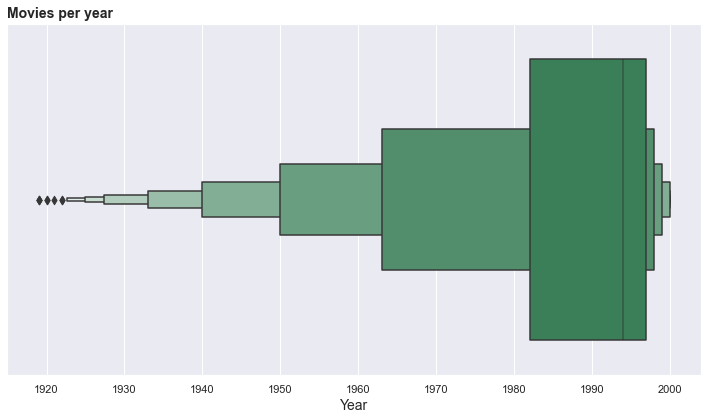

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxenplot(data=movies, x="Year", ax=ax,
              color="seagreen")

plt.title("Movies per year", fontweight="bold", loc="left", size=14)
ax.set_xlabel("Year", size=14)

plt.tight_layout()
plt.savefig("movies - graph1")
plt.show()

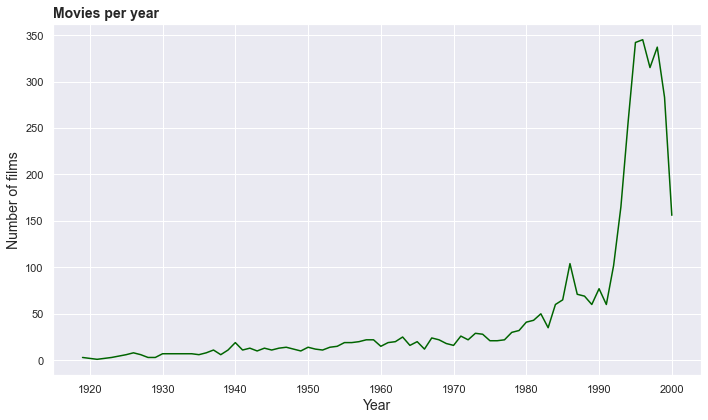

In [42]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=movies_per_year, x=movies_per_year.index, y=movies_per_year.values, 
             color="darkgreen", ax=ax)

plt.title("Movies per year", fontweight="bold", loc="left", size=14)
ax.set_xlabel("Year", size=14)
ax.set_ylabel("Number of films", size=14)

plt.tight_layout()
plt.savefig("movies - graph2")
plt.show()

#### Pel·lícules per gènere

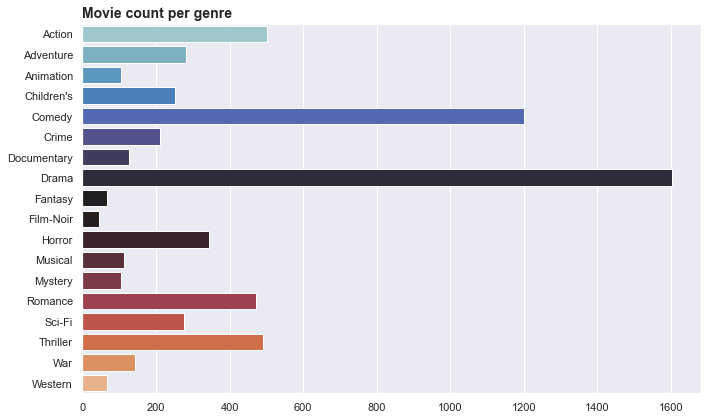

In [43]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x=df_genres.sum(axis=0), y=df_genres.sum(axis=0).index, 
            ax=ax, orient="h", palette="icefire")

plt.title("Movie count per genre", fontweight="bold", loc="left", size=14)

plt.tight_layout()
plt.savefig("movies - graph3")
plt.show()

In [29]:
# Afegim la columna Ngenres amb el nombre de gèneres de cada pel·lícula
movies["Ngenres"] = movies.iloc[:, 2:].sum(axis=1)
movies[["Ngenres", "Title"]].groupby("Ngenres").count()

,Title
Ngenres,
1,2025
2,1322
3,421
4,100
5,14
6,1


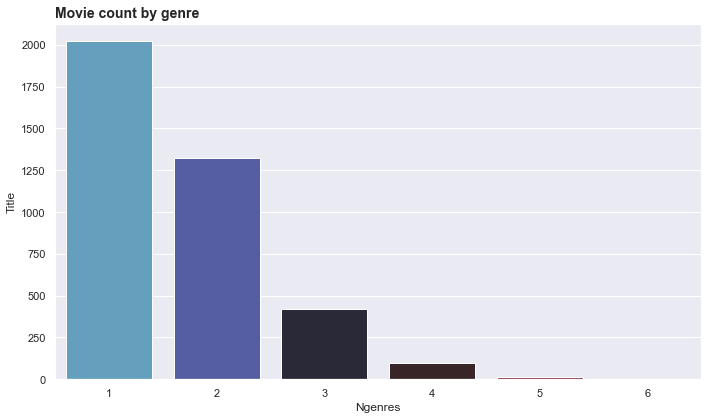

In [44]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x=movies.groupby(["Ngenres"]).count().index, y=movies.groupby(["Ngenres"]).count().Title, 
            ax=ax, palette="icefire")

plt.title("Movie count by genre", fontweight="bold", loc="left", size=14)

plt.tight_layout()
plt.savefig("movies - graph4")
plt.show()

#### Evolució del gèneres per any

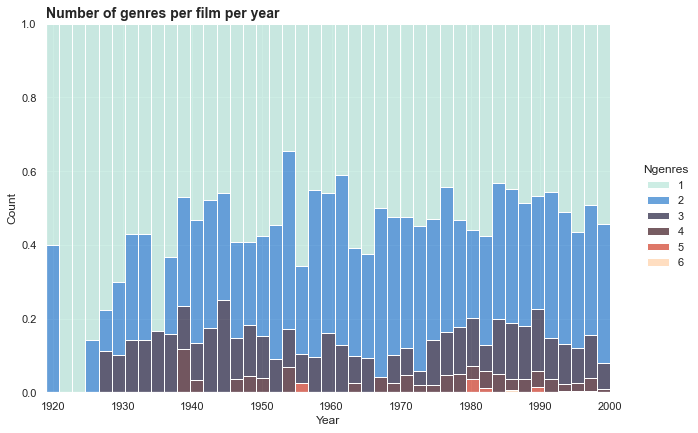

In [45]:
sns.displot(data=movies, x="Year", kind="hist",
            hue="Ngenres", multiple="fill",
            height=6, aspect=1.5, palette="icefire")

plt.title("Number of genres per film per year", fontweight="bold", loc="left", size=14)

plt.savefig("movies - graph5")
plt.show()

In [32]:
genres_per_year = movies.drop("Ngenres", axis=1).melt(id_vars=["Title", "Year"])
genres_per_year = genres_per_year[genres_per_year["value"] != 0]
genres_per_year = genres_per_year.groupby(["Year", "variable"]).count()
genres_per_year.unstack(level=0, fill_value=0)

Title                                               ... value  \
Year         1919 1920 1921 1922 1923 1925 1926 1927 1928 1929  ...  1991   
variable                                                        ...         
Action          1    0    1    0    0    0    0    0    0    0  ...     6   
Adventure       1    0    0    0    0    0    1    0    0    0  ...     4   
Animation       0    0    0    0    0    0    0    0    0    0  ...     2   
Children's      0    0    0    0    0    0    0    0    0    0  ...     3   
Comedy          1    2    0    0    2    3    1    2    3    0  ...    24   
Crime           0    0    0    0    0    0    1    0    0    0  ...     1   
Documentary     0    0    0    0    0    0    0    0    0    0  ...     1   
Drama           2    0    0    1    1    3    4    4    0    1  ...    26   
Fantasy         0    0    0    0    0    0    0    0    0    0  ...     3   
Film-Noir       0    0    0    0    0    0    0    0    0    0  ...     0   
Horror          0    0    0    1    0    0    0    0    0    0  ...     3   
Musical         0    0    0    0    0    0    0    0    0    1  ...     2   
Mystery         0    0    0    0    0    0    0    0    0    0  ...     4   
Romance         0    0    0    0    0    0    0    2    0    0  ...     9   
Sci-Fi          0    0    0    0    0    0    1    0    0    0  ...     6   
Thriller        0    0    0    0    0    0    1    0    0    1  ...     7   
War             0    0    0    0    0    1    0    1    0    0  ...     1   
Western         0    0    0    0    0    0    0    0    0    0  ...     0   

                                                          
Year        1992 1993 1994 1995 1996 1997 1998 1999 2000  
variable                                                  
Action        21   25   32   45   37   43   44   27   19  
Adventure      3   10   15   25   22   22   16    7    6  
Animation      3    4    5    8    7    6    8    7    8  
Children's     7   12   20   22   20   22   18   11    9  
Comedy        37   47   96   89  115   98  112  103   69  
Crime         10    8    9   18   23   26   25   12    8  
Documentary    1    5   11   22   19   11   18   15    8  
Drama         38   81  121  158  150  139  166  130   55  
Fantasy        1    3    5    4    5    6    2    2    1  
Film-Noir      0    1    0    1    2    2    3    0    0  
Horror        12    9   13   16   12   10   15   14    8  
Musical        3    3    2    4    7    5    3    1    1  
Mystery        2    7    3    8    6   15   10    5    1  
Romance       14   18   37   50   48   52   58   37   17  
Sci-Fi         8   11    8   18   14   18   17   15   10  
Thriller      14   22   31   43   45   55   51   40   25  
War            3    5    7   12    8   10    5    4    2  
Western        1    2    6    4    1    0    1    1    0  

[18 rows x 162 columns]

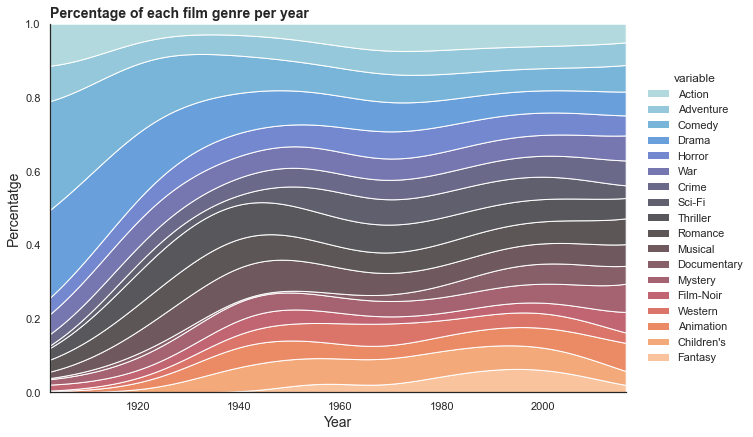

In [46]:
with sns.axes_style("white"):
    
    sns.displot(data=genres_per_year, x="Year", hue="variable", 
                kind="kde", multiple="fill",
                height=6, aspect=1.5, palette="icefire")

    plt.title("Percentage of each film genre per year", fontweight="bold", loc="left", size=14)
    plt.xlabel("Year", size=14)
    plt.ylabel("Percentatge", size=14)
    
    plt.savefig("movies - graph6")
    plt.show()